In [39]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [40]:
x = torch.rand(100)
y = x**2

In [41]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(100,100,bias=False)
        self.Matrix2 = nn.Linear(100,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

In [42]:
f = MyNeuralNet()

In [43]:
yHat = f(x)

In [44]:
L = nn.MSELoss()
L(y,yHat)

tensor(0.2352, grad_fn=<MseLossBackward0>)

In [45]:
opt = SGD(f.parameters(), lr=0.001)

In [46]:
losses = []
for i in range(50):
    opt.zero_grad()
    loss_value = L(f(x),y)
    loss_value.backward()
    opt.step()
    losses.append(loss_value.item())

Text(0.5, 0, 'Epochs')

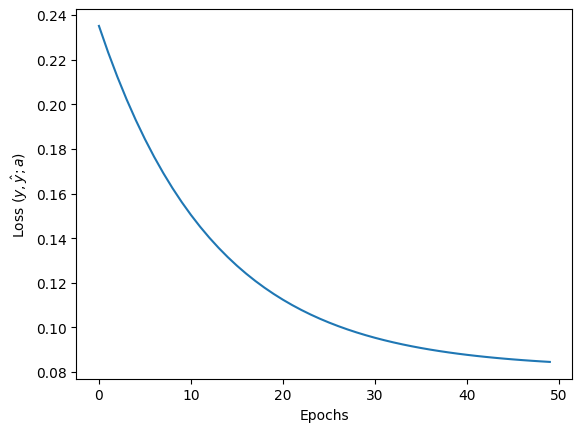

In [47]:
plt.plot(losses)
plt.ylabel("Loss $(y,\hat{y};a)$")
plt.xlabel("Epochs")

Now I gotta try it out with some other data

In [48]:
new_x = torch.rand(100)
new_y = new_x**2

In [49]:
new_yHat = f(new_x)

In [50]:
L(new_y, new_yHat)

tensor(0.1222, grad_fn=<MseLossBackward0>)

In [51]:
losses = []
for i in range(50):
    opt.zero_grad()
    loss_value = L(f(new_x),new_y)
    loss_value.backward()
    opt.step()
    losses.append(loss_value.item())

Text(0.5, 0, 'Epochs')

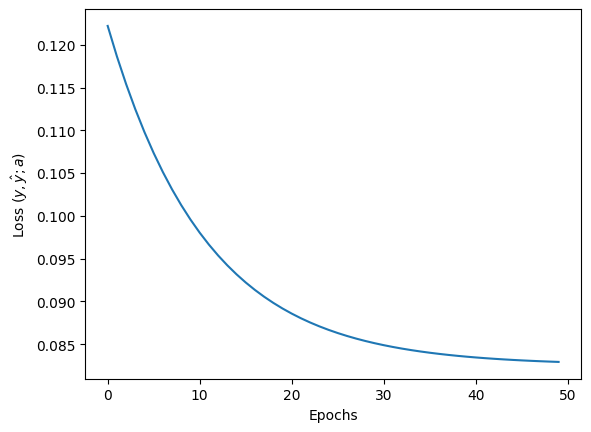

In [52]:
plt.plot(losses)
plt.ylabel("Loss $(y,\hat{y};a)$")
plt.xlabel("Epochs")